# **Week 3: Bivariate Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we’ll explore statistical summaries of bivariate data and demonstrate how to compute them using R. If you are not familiar with R programming, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) and [Week 1](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_1.ipynb) content.

**You may notice some content overlaps with previous workshops. Consider this an opportunity to revisit earlier ideas and discover their connections to the current topics.**

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [1]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [2]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🌈



## **Multivariate Data**

Multivariate data arises when we collect more than one observations per experimental unit, for example surveys can ask individuals multiple questions, resulting in a multivariate data set.


### **Example: `iris` Dataset**

In [3]:
iris %>% str()

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


### **Bivariate Data As A Special Case of Multivariate Data**

Bivariate data is a special case where we have two measurements per experimental unit. Bivariate data is useful especially when we want to examine the nature of the relationship between two variables. Bivariate data can be categorical, numerical, or some combination of the two. Note that bivariate data can be extracted from a larger multivariate dataset for the purposes of analyses.

In [4]:
iris %>%
  select(Sepal.Length, Sepal.Width) %>%
  str()

'data.frame':	150 obs. of  2 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...


While bivariate data analysis is relatively straightforward, it lays the essential foundation for understanding and applying more advanced multivariate techniques in later units.

## **Bivariate Categorical Data**

Bivariate cetegorical data occurs when we have two observations of an experimental unit that are both **categorical variables**. These can be summarised easily and compactly in tables, but also provides some structure to indicate the relationship between the variables.



### **Example: `titanic` Dataset**

This dataset is derived from the well-known `Titanic` dataset, which contains information on 2,201 passengers aboard the Titanic, including their:
- Passenger class (`class`)
- Sex (`sex`)
- Age group (`age_status`, i.e., adult or child)
- Survival status (`survived`)

We will begin by exploring bivariate relationships between key variables in the dataset to uncover potential associations. Here, we will mostly focus on informal, exploratory summaries — no formal statistical tests yet — to answer questions like:

1. Is there an association between passenger class and survival?
2. Is there an association between sex and survival?

We will use simple tools like frequency tables and proportions to investigate these relationships. More rigorous analysis techniques will be introduced in the coming weeks.


In [5]:
titanic = read.csv("./datasets/titanic.csv", stringsAsFactors = T)
titanic %>%
  str()

titanic %>%
  head(5)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Sex     : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age     : Factor w/ 2 levels "Adult","Child": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


### **Table**

Bivariate categorical data can be summarised by a two-dimensional table, often called a contingency table, where:

- Each row corresponds to a category of one variable,
- Each column corresponds to a category of the other variable,
- And each cell contains the count or proportion of observations that fall into that specific combination of categories.

To create a contingency table in R, we can use the `table()` function.


#### **Example: `Survived` vs. `Class`**

We want to answer the question:

> Is there an association between passenger class and survival?

We can create a contingency table to show the relationship between `Survived` and `Class`.

In [6]:
table(titanic$Class, titanic$Survived)

# This gives the same results
# titanic %>%
#   select(Class, Survived) %>%
#   table()

      
        No Yes
  1st  122 203
  2nd  167 118
  3rd  528 178
  Crew 673 212

This table displays the raw counts of observations for each combination of categories. We can convert these counts into proportions using the `prop.table()` function, which can take a contingency constructed via `table()` as input.

In [7]:
prop.table(table(titanic$Class, titanic$Survived))*100 #*100 for percentage

      
              No       Yes
  1st   5.542935  9.223080
  2nd   7.587460  5.361199
  3rd  23.989096  8.087233
  Crew 30.577010  9.631985

By default, the function `prop.table()` computes the **unconditional proportion**, which is the proportion of individuals in a specific combination of categories relative to the entire population.  For example, around 9% of the passengers were in first class and survived.


However, this unconditional proportion may be difficult to interpret, especially when the groups are imbalanced — for example, there are usually fewer people in first class than in third class. Such imbalances can obscure the underlying relationship.

To address this, we often **normalise by class** (i.e., compute conditional proportions within each class). This expresses the proportion of survivors **within each class**, making it easier to compare survival rates across classes regardless of their sizes. This can be done by setting the `margin` option in `prop.table()`:

- `margin = 1`: Normalises by row (i.e., within each class)
- `margin = 2`: Normalises by column

We will connect this with the idea of conditional probability later in the unit.

In [8]:
prop.table(table(titanic$Class, titanic$Survived), margin = 1)*100

      
             No      Yes
  1st  37.53846 62.46154
  2nd  58.59649 41.40351
  3rd  74.78754 25.21246
  Crew 76.04520 23.95480

For example, we can see that out of all passengers who were in first class, around 62% survived.  Compare this with say the proportion of third class passengers that survived, which was only around 25%.

**What is your conclusion 🙂?**

#### **Creating Contingency Tables via `dplyr`**

**Raw Counts**

In [9]:
#Long-format contingency table
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  kable(caption = "Class vs. Survived (Raw Counts & Long-Format)")



Table: Class vs. Survived (Raw Counts & Long-Format)

|Class |Survived | Count|
|:-----|:--------|-----:|
|1st   |No       |   122|
|1st   |Yes      |   203|
|2nd   |No       |   167|
|2nd   |Yes      |   118|
|3rd   |No       |   528|
|3rd   |Yes      |   178|
|Crew  |No       |   673|
|Crew  |Yes      |   212|

In [10]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  pivot_wider(
    names_from = Survived,
    values_from = Count,
    values_fill = 0
  ) %>%
  kable(caption = "Class vs. Survived (Raw Counts)")



Table: Class vs. Survived (Raw Counts)

|Class |  No| Yes|
|:-----|---:|---:|
|1st   | 122| 203|
|2nd   | 167| 118|
|3rd   | 528| 178|
|Crew  | 673| 212|

**Unnormalised Frequencies/Proportions**

In [11]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Freq = Count / sum(Count)) %>%
  select(Class, Survived, Freq)  %>%
  kable(caption = "Class vs. Survived (Unnormalised, Long-Format)")



Table: Class vs. Survived (Unnormalised, Long-Format)

|Class |Survived |      Freq|
|:-----|:--------|---------:|
|1st   |No       | 0.0554294|
|1st   |Yes      | 0.0922308|
|2nd   |No       | 0.0758746|
|2nd   |Yes      | 0.0536120|
|3rd   |No       | 0.2398910|
|3rd   |Yes      | 0.0808723|
|Crew  |No       | 0.3057701|
|Crew  |Yes      | 0.0963199|

In [12]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Freq = Count / sum(Count)) %>%
  select(Class, Survived, Freq) %>%
  pivot_wider(
    names_from = Survived,
    values_from = Freq,
    values_fill = 0
  ) %>%
  kable(caption = "Class vs. Survived (Unnormalised)")



Table: Class vs. Survived (Unnormalised)

|Class |        No|       Yes|
|:-----|---------:|---------:|
|1st   | 0.0554294| 0.0922308|
|2nd   | 0.0758746| 0.0536120|
|3rd   | 0.2398910| 0.0808723|
|Crew  | 0.3057701| 0.0963199|

**Normalised Frequencies/Proportions**

In [13]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Class, Survived, Freq) %>%
  kable(caption = "Class vs. Survived (Normalised by Class, Long-Format)")



Table: Class vs. Survived (Normalised by Class, Long-Format)

|Class |Survived |      Freq|
|:-----|:--------|---------:|
|1st   |No       | 0.3753846|
|1st   |Yes      | 0.6246154|
|2nd   |No       | 0.5859649|
|2nd   |Yes      | 0.4140351|
|3rd   |No       | 0.7478754|
|3rd   |Yes      | 0.2521246|
|Crew  |No       | 0.7604520|
|Crew  |Yes      | 0.2395480|

In [14]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Class, Survived, Freq) %>%
  pivot_wider(
    names_from = Survived,
    values_from = Freq,
    values_fill = 0
  )  %>%
  kable(caption = "Class vs. Survived (Normalised by Class)")



Table: Class vs. Survived (Normalised by Class)

|Class |        No|       Yes|
|:-----|---------:|---------:|
|1st   | 0.3753846| 0.6246154|
|2nd   | 0.5859649| 0.4140351|
|3rd   | 0.7478754| 0.2521246|
|Crew  | 0.7604520| 0.2395480|

### **Graphical Summaries**




#### **Bar Chart**

There are several options for visualising bivariate categorical data. Among these, bar plots are the most commonly used.

We can use `ggplot() %>% geom_bar()` to create bar plots that compare categories across two variables. To display these segments side-by-side (rather than stacked), we add the option `position = "dodge"` to `geom_bar()`.

One convenient option for creating bar plots is to input the raw dataset directly into `ggplot()`. `geom_bar()` by default counts the number of cases for each `x` value (i.e., it computes frequencies automatically). This is called the statistical transformation (or `stat`) and the default is `stat = "count"`.

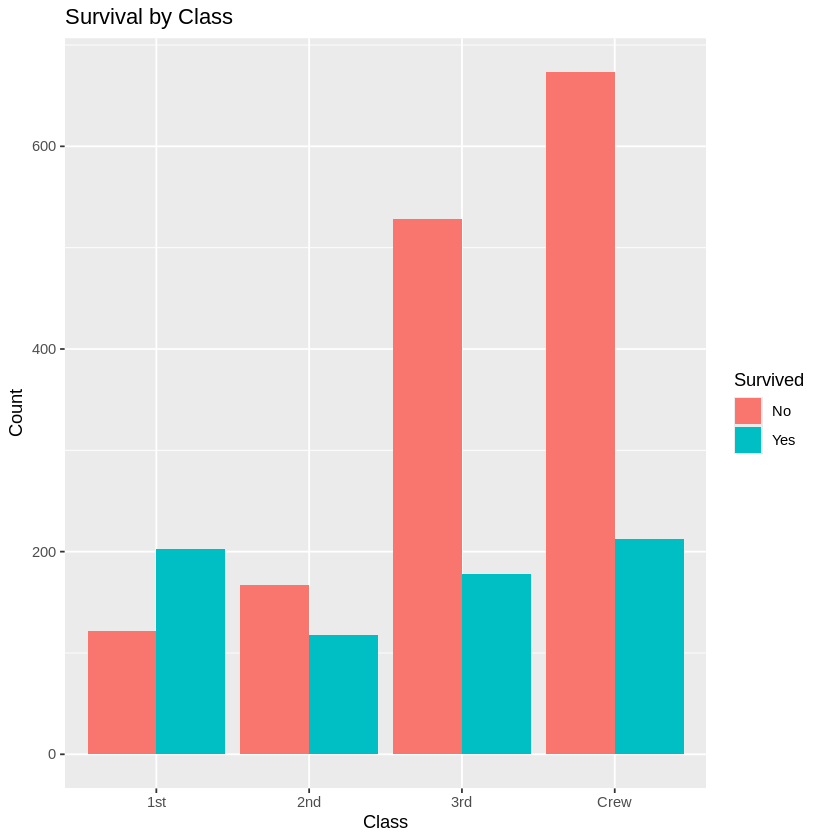

In [15]:
titanic %>%
  ggplot(aes(x = Class, fill = Survived)) +
  geom_bar(stat = "count", position = "dodge") +
  labs(y = "Count", title = "Survival by Class")

Another option, which is less convenient but provides greater control, is to manually construct a long-format contingency table.

We need to set `stat = "identity"`. Here, you’re telling `geom_bar()`:

> **“Don’t do any counting — just use the y values I provide directly.”**

This means you have to supply the y-values yourself (e.g., counts, proportions, or any numeric variable), and `geom_bar()` will just plot bars with those heights.

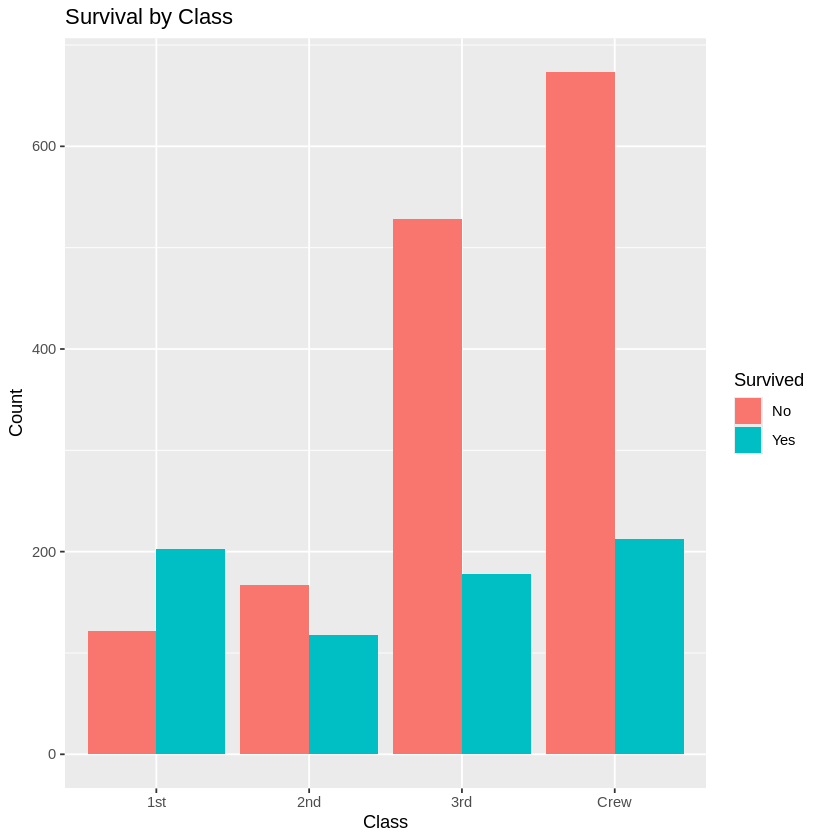

In [16]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  ggplot(aes(x = Class, y = Count, fill = Survived)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(y = "Count", title = "Survival by Class")


However, these are raw counts, which may be misleading when the groups are unbalanced. We need to normalise the counts within each class to account for class imbalance. Constructing a long-format contingency table gives us the flexibility and control needed to calculate these proportions.

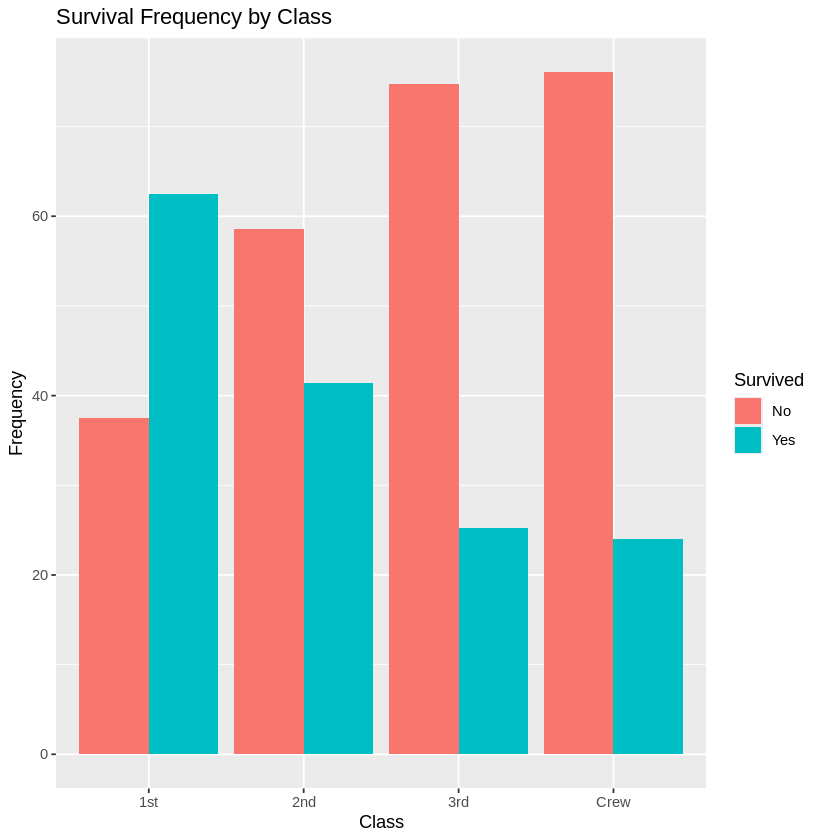

In [17]:
titanic %>%
  group_by(Class, Survived) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Class) %>%
  mutate(Freq = 100*Count / sum(Count)) %>% #Here sum(Count) is computed within Class
  ungroup() %>%
  select(Class, Survived, Freq) %>%
  ggplot(aes(x = Class, y = Freq, fill = Survived)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(y = "Frequency", title = "Survival Frequency by Class")

#### **Mosaic Plot (Optional)**

Mosaic plots are a base R visualisation (available via the `mosaicplot()` function) that directly takes a contingency table as input. They display the joint distribution of two categorical variables by sizing tiles proportionally to counts/frequencies. This makes it easy to spot associations or differences between categories at a glance.


**Raw Counts**

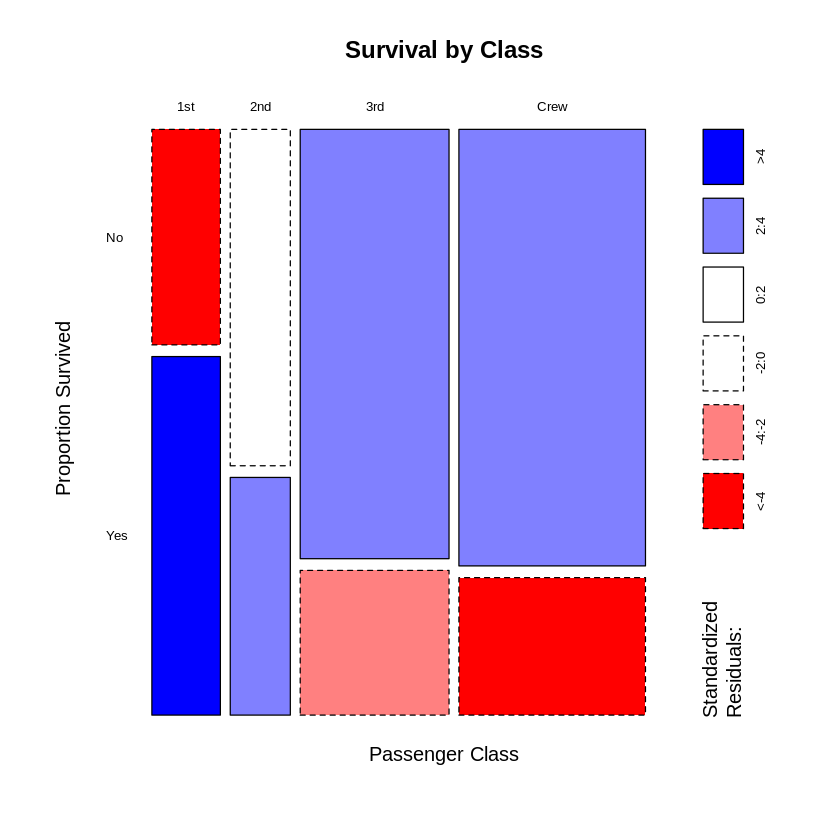

In [18]:
titanic %>%
  select(Class, Survived) %>%
  table() %>%
  mosaicplot(main = "Survival by Class",
             xlab = "Passenger Class",
             ylab = "Proportion Survived",
             color = TRUE,
             shade = TRUE,
             las = 1)

**Normalised Frequencies**

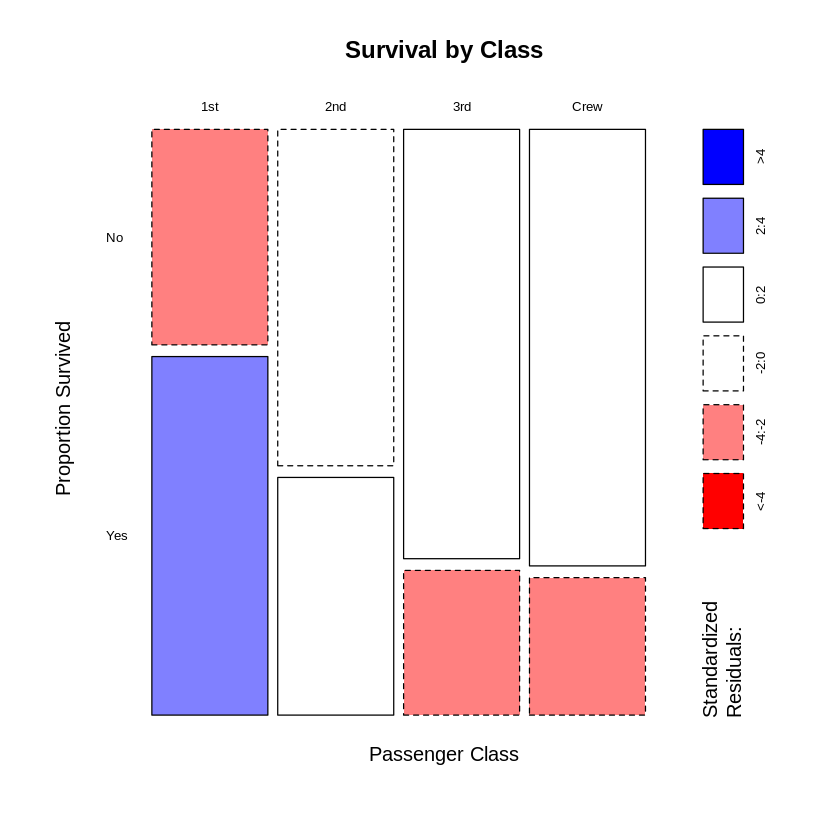

In [19]:
titanic %>%
  select(Class, Survived) %>%
  table() %>%
  prop.table(margin = 1) %>%
  multiply_by(100) %>%
  mosaicplot(main = "Survival by Class",
             xlab = "Passenger Class",
             ylab = "Proportion Survived",
             color = TRUE,
             shade = TRUE,
             las = 1)

## **Bivariate Combined Data Types**


Combined bivariate data includes both numeric and categorical data, these can be very common datasets to find, and arise from looking at how different factors influence some numerical measurements.

For example, in the iris dataset, we can extract the numeric variable `Sepal.Length` and the categorical variable `Species` to create a bivariate dataset combining both types of data.


In [20]:
iris %>%
  select(Sepal.Length, Species) %>%
  head(5)

,Sepal.Length,Species
,<dbl>,<fct>
1,5.1,setosa
2,4.9,setosa
3,4.7,setosa
4,4.6,setosa
5,5.0,setosa


When working with bivariate datasets that combine numeric and categorical variables, some key questions we might want to answer include:

1. How does the numeric variable differ across the categories?
2. Are there clear patterns or differences in distribution by category?
3. Can the categorical variable help explain variability in the numeric variable?
4. What summary statistics (mean, median, range) characterise each group?
5. Are there outliers or unusual observations within any category?

Techniques for formally addressing many of these questions will be introduced later in this unit. For now, we will focus primarily on graphical and informal summaries, especially to explore questions 2 and 4.


### **Exercises**

#### **Exercise 1**

Compute the mean and standard deviation of `Sepal.Length` for each `Species` in the `iris` dataset. Based on these, determine whether the intervals defined by mean ± 2 standard deviations overlap between `Species`.

<details>
<summary>▶️ Click to show the solution</summary>

```r
iris %>%
  group_by(Species) %>%
  summarise(
    meanSepalLength = mean(Sepal.Length),
    sdSepalLength = sd(Sepal.Length)
  ) %>%
  ungroup() %>%
  mutate(lowerInterval = meanSepalLength - 2*sdSepalLength,
         upperInterval = meanSepalLength + 2*sdSepalLength)
```

</details>

#### **Exercise 2**

Compare the distributions of `Sepal.Length` across all `Species` in the `iris` dataset using boxplots. Interpret the results.

<details>
<summary>▶️ Click to show the solution</summary>

```r
iris %>%
  ggplot(aes(x = Species, y = Sepal.Length, fill = Species)) +
  geom_boxplot() +
  labs(title = "Distribution of Sepal Length by Species",
       x = "Species",
       y = "Sepal Length") +
  theme_minimal()

# The Sepal Length for Sentosa seems to be smaller than that of Versicolor and
# Virginica, since there is no overlap in the interquartile ranges. Indeed,
# almost all the Sepal Lengths for Virginica are larger than that for Sentosa,
# since there is almost no overlap in their boxolots. The Sepal Length for
# Versicolor seems to also be smaller than Virginica, but it is more difficult
# to tell as there is a small overlap in the interquartile ranges of the
# boxplots. There seems to be an unusually small value of Sepal Length for
# Virginica.
```

</details>

#### **Exercise 3**

Compare the distributions of `city` EPA across all `trans` (transmission) types in the `epa_data` dataset using histograms.  Interpret the results.

**Hint**: Instead of using `facet_wrap()`, set `position = "identity"` in `geom_histogram()` to overlay histograms. Set `alpha = 0.7` (transparency level) for better visibility.

In [23]:
epa_data = read.csv("./datasets/epa_data.csv")
epa_data %>% head()

,city,hwy,cyl,disp,drive,make,model,trans,year
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16,24,8,5.0,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
2,15,22,8,5.0,Rear-Wheel Drive,Jaguar,XK,Automatic,2010
3,16,22,8,5.0,Rear-Wheel Drive,Jaguar,XK Convertible,Automatic,2010
4,19,27,4,2.0,Rear-Wheel Drive,Pontiac,Solstice,Automatic,2010
5,19,29,4,2.0,Rear-Wheel Drive,Pontiac,Solstice,Manual,2010
6,19,24,4,2.4,Rear-Wheel Drive,Pontiac,Solstice,Automatic,2010


<details>
<summary>▶️ Click to show the solution</summary>

```r
epa_data %>%
  ggplot(aes(x = city, fill = trans)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins = 30,
                 alpha = 0.7,
                 color = "black", #border color
                 position = "identity") +             
  labs(title = "Stacked Normalised City MPG Distribution by Transmission Type",
       x = "City MPG",
       y = "Density",
       fill = "Transmission") +
  theme_minimal()

# The City MPG seems to have a similar measure of centrality between Automatic
# and Manual, however the City MPG values of Automatic are substantially more
# dispersed. In particular, Automatic shows a substantial amount of positive
# skewness (skew to the right), whereas the distribution of City MPG values for
# Manual is closer to symmetric.

```

</details>

## **Bivariate Numeric Data**

Finally, the more interesting part: exploring relationships between two numeric variables. We'll look at scatterplots, correlation, and trend patterns to better understand how two continuous measurements vary together.



### **Covariance**

If sample variance for a numeric vector `x` is defined as:

$$
s_x^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}
$$

or the "mean" of the squared distance between observations, then it follows that covariance is defined as:

$$
s_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

where:

- $(x_i, y_i)$ is a **paired** observation indexed by $i$.
- $\bar{x}, \bar{y}$ are the sample means of $x$ and $y$.
- $n$ is the number of observations.

**By definition, sample variance is the covariance between one variable and itself.**


Covariance is a statistical measure that quantifies the degree to which two variables change together. Specifically, it measures the **linear relationship** between two continuous variables.

- A **positive covariance** indicates that as one variable increases, the other tends to increase as well.
- A **negative covariance** means that as one variable increases, the other tends to decrease.
- A covariance close to zero suggests there is little to no linear relationship between the variables.


In R, we can use `cov(x,y)` to compute covariance between variables `x` and `y`.

#### **Example**

Notice that as `city` EPA increases, `hwy` EPA tends to increase.

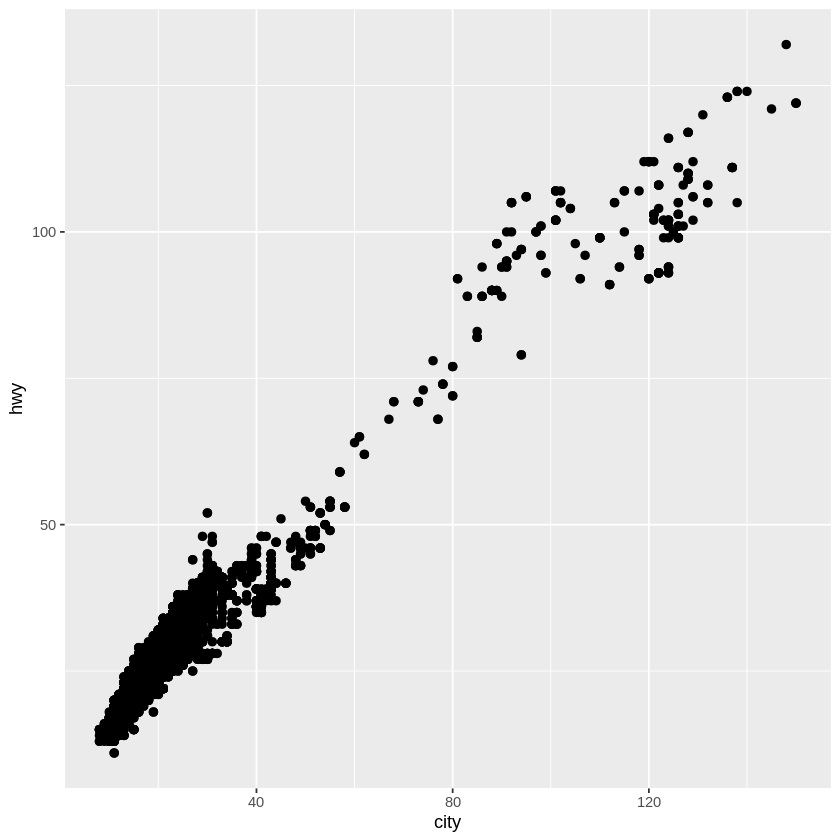

In [25]:
epa_data %>%
  ggplot(aes(x = city, y = hwy)) +
  geom_point(size = 2)

Their covariance is indeed positive.

In [26]:
cov(epa_data$city, epa_data$hwy)

[1] 132.6544

It seems that as engine displacement (`disp`) increases, `city` EPA decreases.

Warning message:
“Removed 215 rows containing missing values or values outside the scale range
(`geom_point()`).”


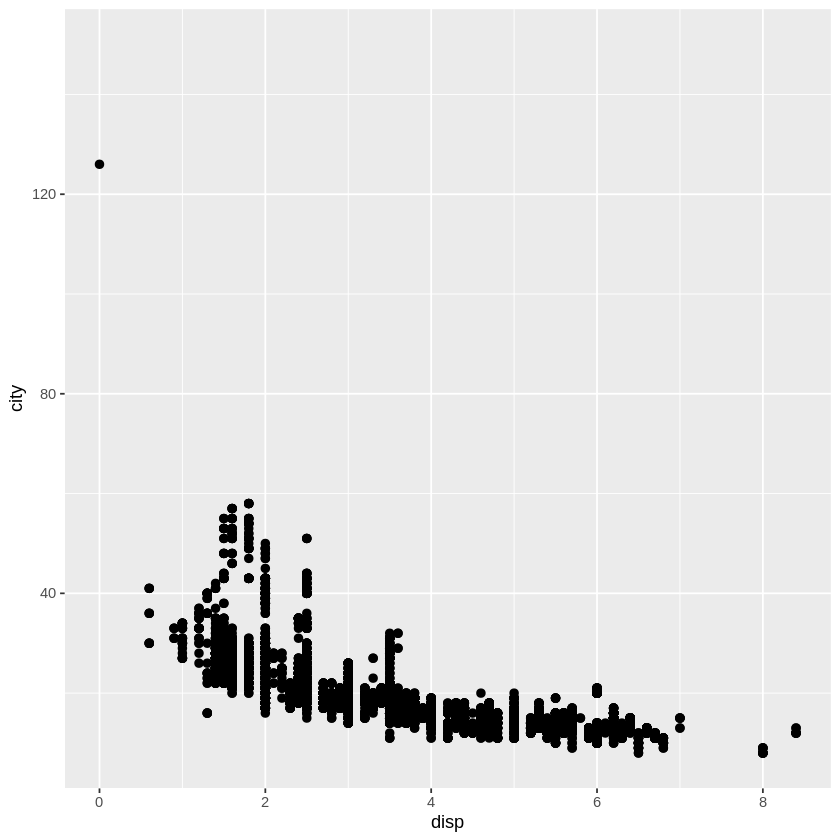

In [27]:
epa_data %>%
  ggplot(aes(x = disp, y = city)) +
  geom_point(size = 2)

Their covariance is indeed negative.

In [28]:
cov(epa_data$city, epa_data$disp, use = "complete.obs") #use = "complete.obs" to ignore incomplete pairs (containing NAs)

[1] -5.80159

### **Correlation**

Covariance tells us the **direction** of the linear relationship between two variables but does **not** tell us how **strong** that relationship is.

Additionally, covariance depends on the **units** of measurement (the scale of the data). For example, imagine we no longer measure `city` and `hwy` EPA in miles per gallon (mpg), but instead in kilometers per litre (km/L or kpL). Since the units have changed, the covariance value would also change, making it difficult to compare across different datasets or variables measured on different scales.



In [29]:
epa_data %>%
  mutate(
    city_kpL = city * 0.425144,
    hwy_kpL = hwy * 0.425144
  ) -> epa_data

epa_data %>%
  select(city, hwy, city, city_kpL, hwy_kpL) %>%
  head(5)

cov(epa_data$city_kpL, epa_data$hwy_kpL)

,city,hwy,city_kpL,hwy_kpL
,<int>,<int>,<dbl>,<dbl>
1,16,24,6.802304,10.203456
2,15,22,6.377160,9.353168
3,16,22,6.802304,9.353168
4,19,27,8.077736,11.478888
5,19,29,8.077736,12.329176


[1] 23.97694

We need a **standardised summary** that can determine both the **direction** and **strength** of a linear relationship, while also being **unitless** and **comparable across different datasets** or examples $⟶$ correlation coefficient.

The **correlation coefficient** $r_{xy}$ between two variables `x` and `y` is given by:

$$
r_{xy} = \frac{s_{xy}}{s_x s_y}.
$$

Thus, correlation is covariance standardised by the product of the variables' standard deviations.

The correlation coefficient $r$ always lies between $-1$ and $1$:

- $r = 1$ indicates a **perfect positive linear relationship**: as one variable increases, the other increases proportionally.
- $r = -1$indicates a **perfect negative linear relationship**: as one variable increases, the other decreases proportionally.
- $r = 0$ suggests **no linear relationship** between the variables.

In R, we can use the `cor(x,y)` function to computes the correlation between numeric vectors `x` and `y`.


#### **Example**


##### **Example 1**
Correlation between `city` EPA and `hwy` EPA is the same regardless of the measurement unit.

In [30]:
cor(epa_data$city, epa_data$hwy)
cor(epa_data$city_kpL, epa_data$hwy)
cor(epa_data$city, epa_data$hwy)
cor(epa_data$city, epa_data$hwy_kpL)

[1] 0.9658684

[1] 0.9658684

[1] 0.9658684

[1] 0.9658684

##### **Example 2**


We have prepared several datasets with different correlation levels to illustrate how the **strength and direction** of the linear relationship between two variables can vary.

Each dataset represents a different scenario:

- Strong positive correlation
- Weak positive correlation
- No correlation
- Weak negative correlation
- Strong negative correlation

**Strong Positive Linear Relationship**

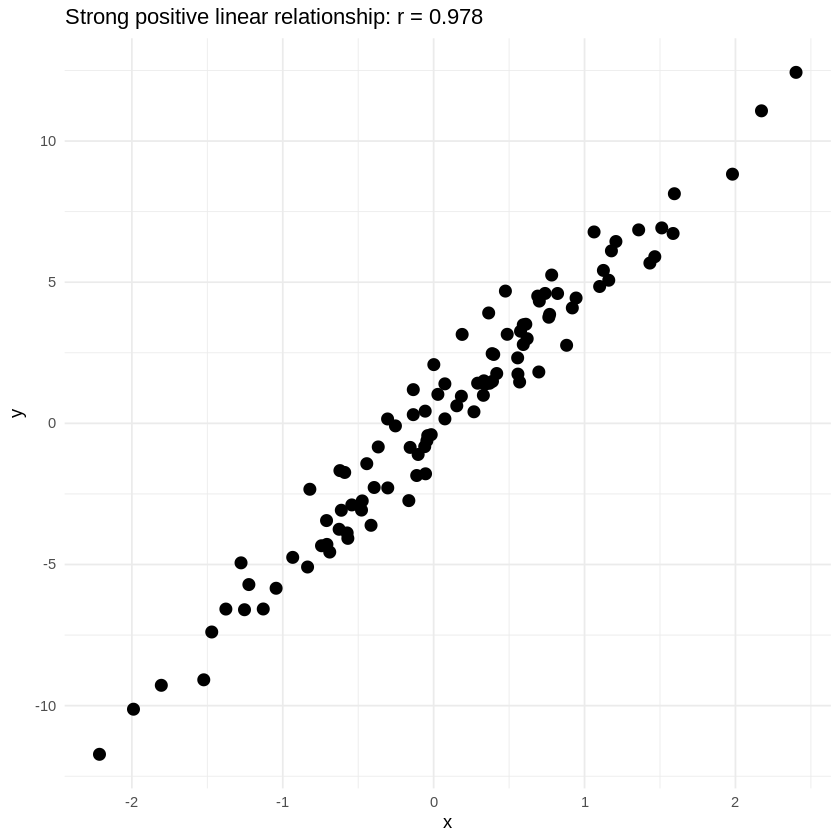

In [31]:
strong_pos = read.csv("datasets/strong_pos_linear.csv")
rVal = cor(strong_pos$x, strong_pos$y)

strong_pos %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Strong positive linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

**Weak Positive Linear Relationship**

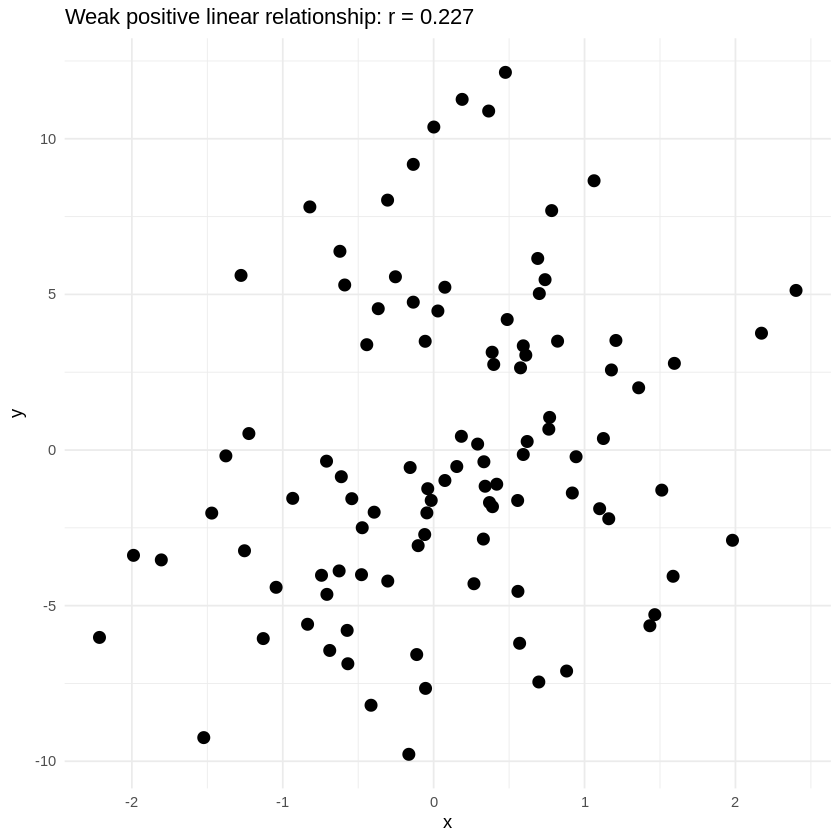

In [32]:
weak_pos = read.csv("datasets/weak_pos_linear.csv")
rVal = cor(weak_pos$x, weak_pos$y)

weak_pos %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Weak positive linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

**No Linear Relationship**

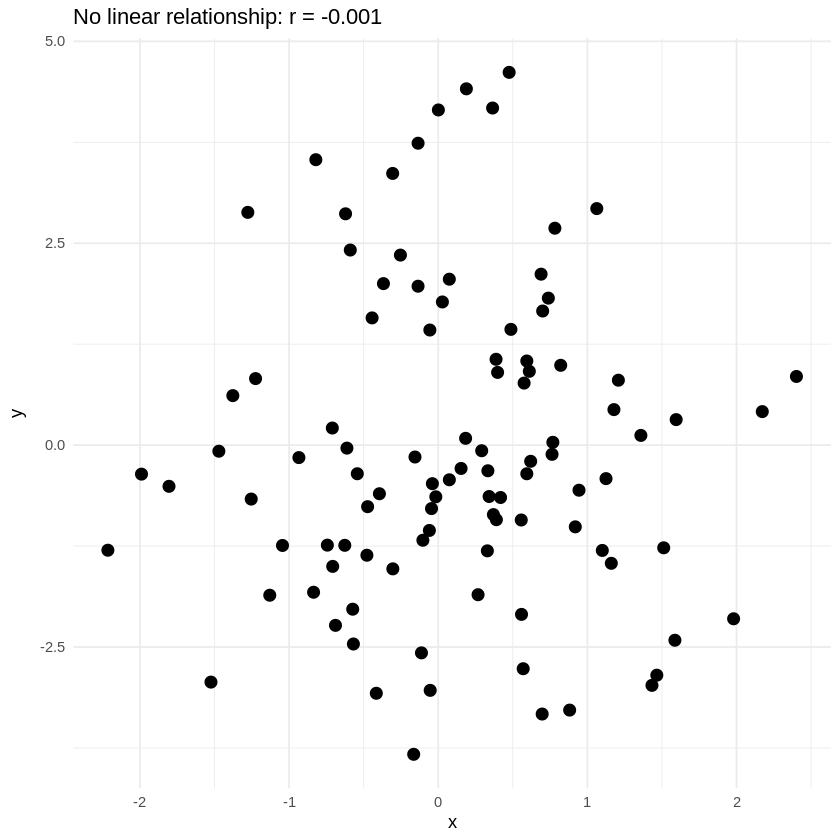

In [33]:
no_linear = read.csv("datasets/no_linear_rel.csv")
rVal = cor(no_linear$x, no_linear$y)

no_linear %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("No linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

**Weak Negative Linear Relationship**

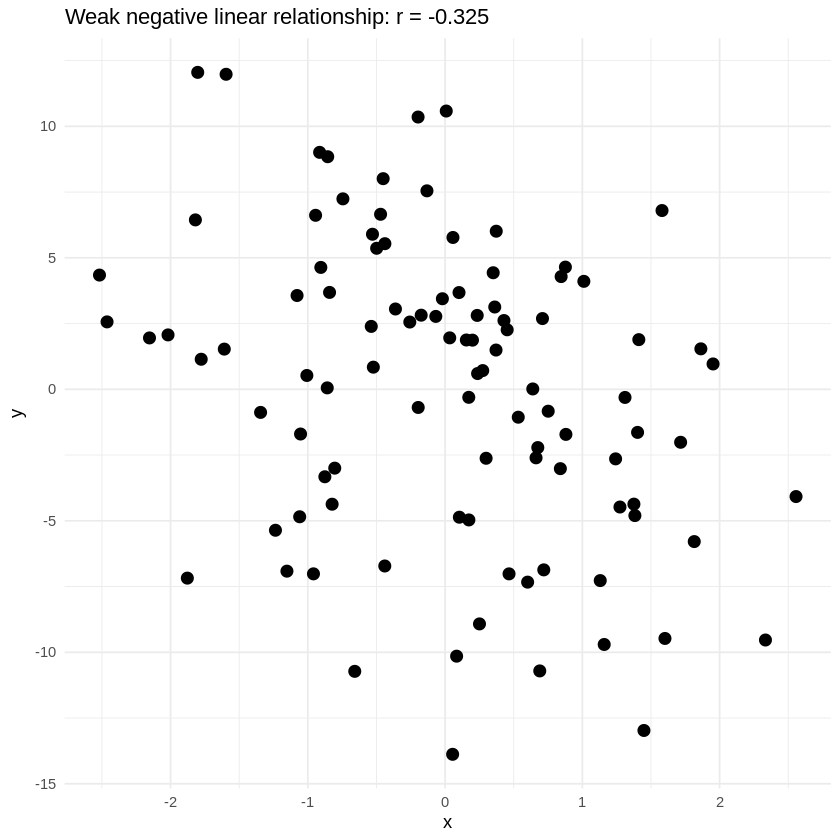

In [34]:
weak_neg = read.csv("datasets/weak_neg_linear.csv")
rVal = cor(weak_neg$x, weak_neg$y)

weak_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Weak negative linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

**Strong Negative Linear Relationship**

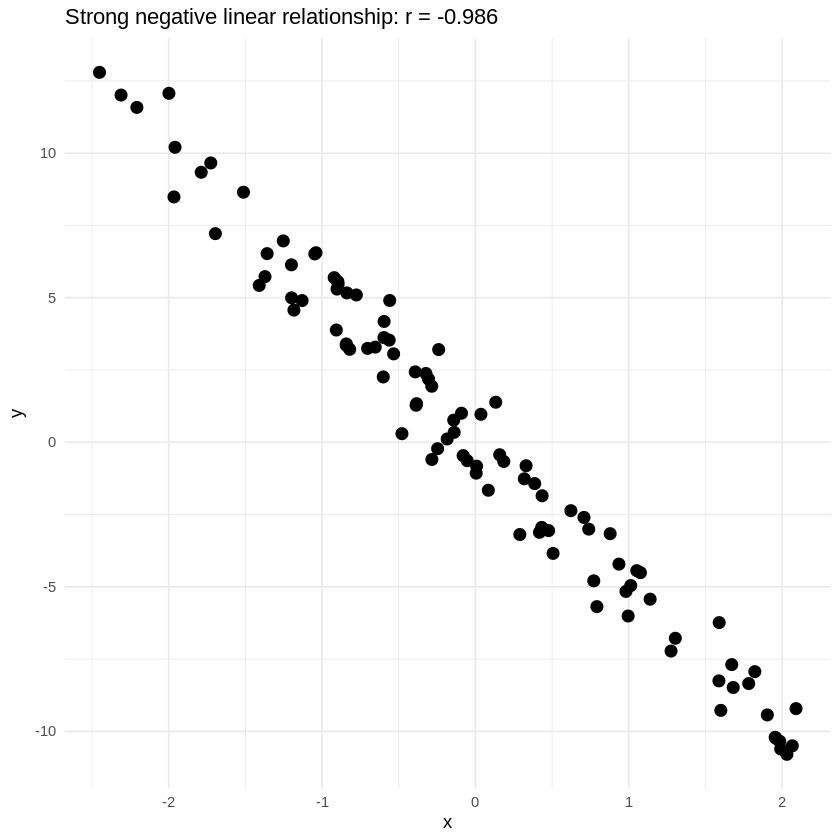

In [35]:
strong_neg = read.csv("datasets/strong_neg_linear.csv")
rVal = cor(strong_neg$x, strong_neg$y)

strong_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  ggtitle(paste0("Strong negative linear relationship: r = ", round(rVal, 3))) +
  theme_minimal()

### **Least-Squares Line**

**To quantify linear relationship** between two variables $x$ and $y$, we can fit a **least-squares regression line** of the form:

$$
y = \hat{a} + \hat{b}x.
$$

This line minimises the total squared vertical distance between the observed points and the line:

$$
\min_{a, b} \sum_{i=1}^{n} (y_i - a - bx_i)^2.
$$

The solutions for the slope $\hat{b}$ and intercept $\hat{a}$ are:

$$
\hat{b} = \frac{s_{xy}}{s_x^2} = r \cdot \frac{s_y}{s_x},
$$
and
$$
\hat{a} = \bar{y} - \hat{b}\bar{x}.
$$

The **slope** depends on the correlation $r$, and the ratio of the standard deviations of $y$ and $x$, having the same sign as $s_{xy}$ and $r_{xy}$. The **intercept** adjusts to ensure the line passes through the point $(\bar{x}, \bar{y})$.

In R, we can use the `lm()` function to compute the slope and intercept of the best fitting line.

#### **Examples**


##### **Example 1**

Given the `strong_pos` dataset that we imported earlier, we can use the `lm()` function in R to compute the slope and intercept of the best-fitting line in a linear regression model.

This function expects a formula as input. Here, the formula is written as:

```r
y ~ x
```
This means we want to fit a linear model of the form:
$$y = ax + b$$

In [36]:
strong_pos %>%
  lm(formula = y~x)


Call:
lm(formula = y ~ x, data = .)

Coefficients:
(Intercept)            x  
   -0.03769      4.99894  


Of course, we can also manually compute these quantities.

In [37]:
mean_x = mean(strong_pos$x)
mean_y = mean(strong_pos$y)
s_xy = cov(strong_pos$x, strong_pos$y)
s_x = var(strong_pos$x)

b_hat = s_xy/s_x
a_hat = mean_y - mean_x*b_hat
b_hat
a_hat

[1] 4.99894

[1] -0.03769261

##### **Example 2**

It is possible to overlay the best-fitting line on a scatter plot created with ggplot using `geom_smooth(method = "lm", se = FALSE)`. If we set `se = TRUE`, it will display confidence bands surrounding the fitted line, providing some "uncertainty quantification." We will learn what confidence intervals are later in this unit.


**Without Confidence Bands**

`geom_smooth()` using formula = 'y ~ x'


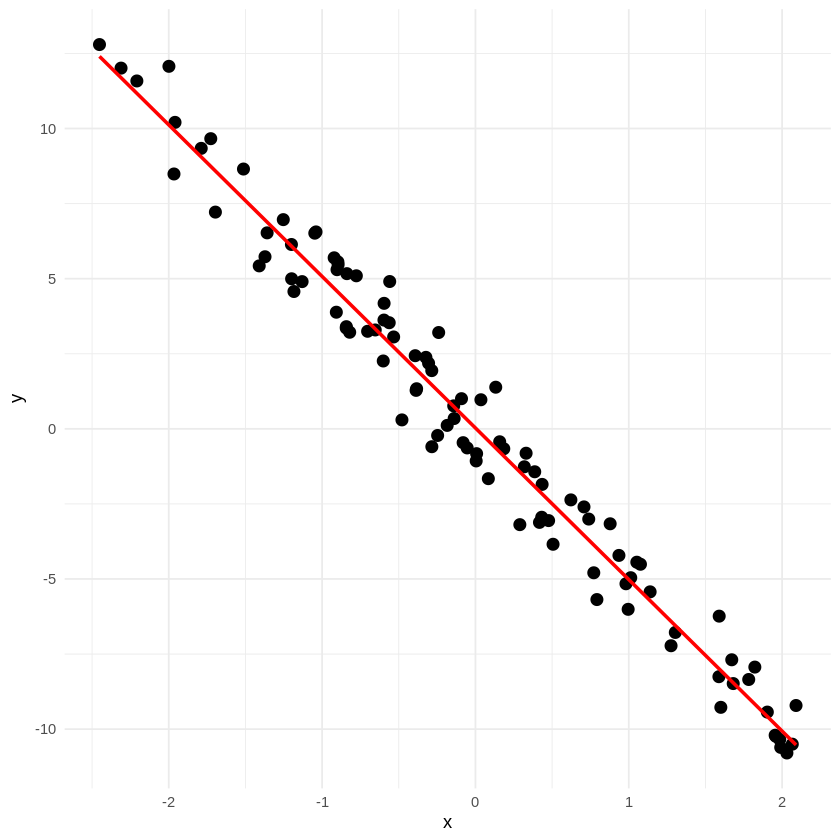

In [38]:
strong_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # best-fitting line
  theme_minimal()


**With Confidence Bands**

`geom_smooth()` using formula = 'y ~ x'


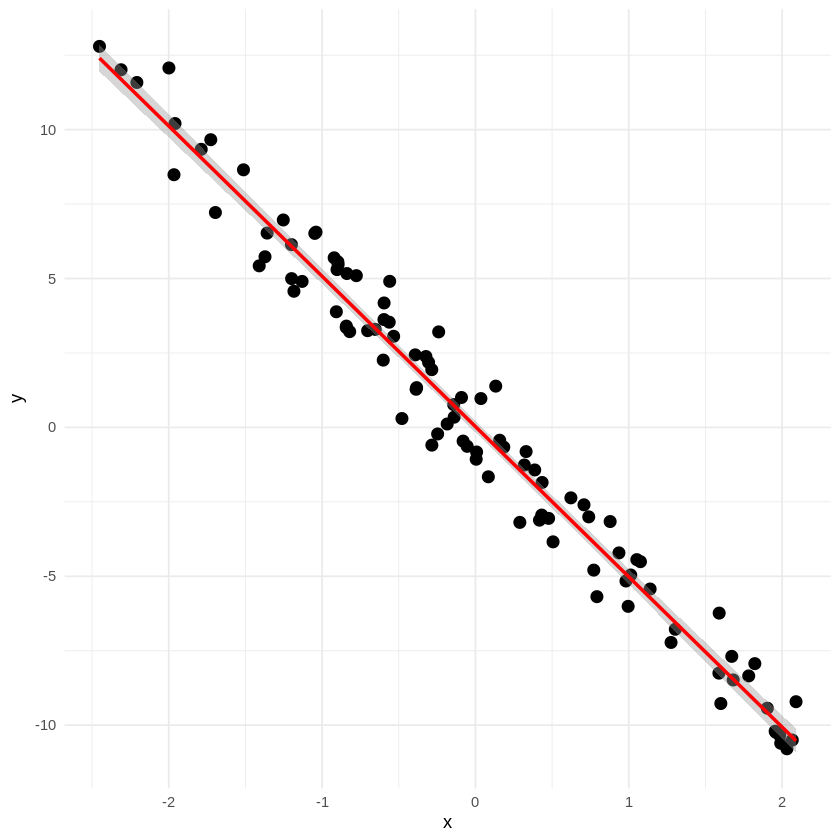

In [39]:
strong_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +  # best-fitting line
  theme_minimal()


**`weak_neg` Example**

Repeat the same analysis process for the `weak_neg` example. We observe a negative linear relationship between `x` and `y`, but the confidence bands are now wider. This is consistent with the weak correlation coefficient.

`geom_smooth()` using formula = 'y ~ x'


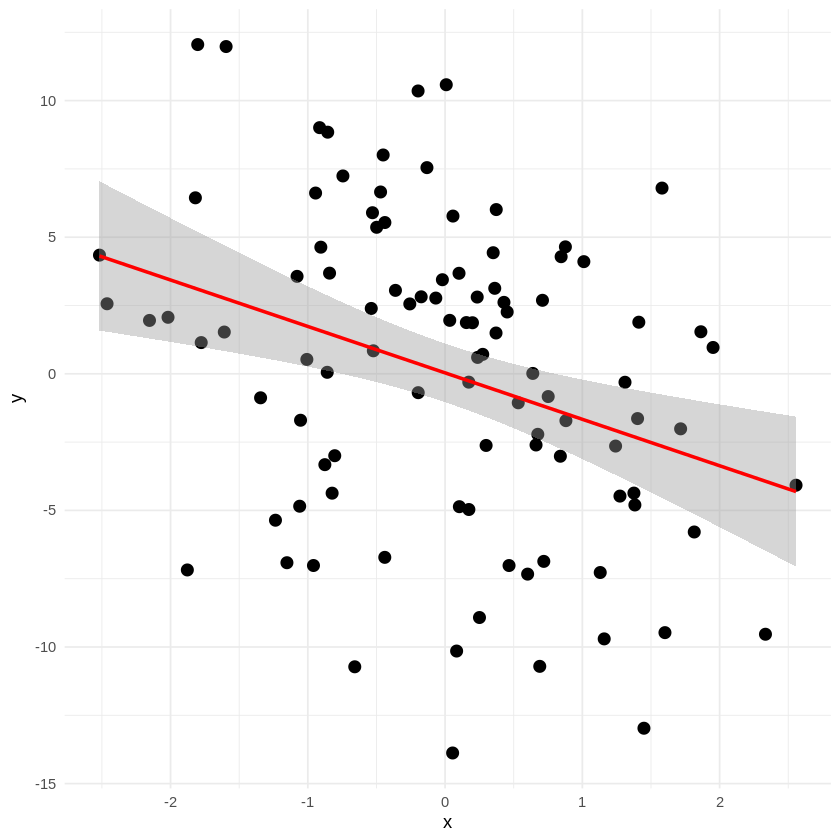

In [40]:
weak_neg %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +  # best-fitting line
  theme_minimal()


### **Exercise**

Repeat the same analysis steps for the dataset `weak_pos`:

1. Fit a linear regression model using `lm(y ~ x)`
2. Manually compute the slope and intercept of the best-fitting line for comparision.
3. Plot the data and the regression line with confidence bands using `ggplot2`.


<details>
<summary>▶️ Click to show the solution</summary>

```r
#1

weak_pos %>%
  lm(formula = y~x)

#2

mean_x = mean(weak_pos$x)
mean_y = mean(weak_pos$y)
s_xy = cov(weak_pos$x, weak_pos$y)
s_x = var(weak_pos$x)

b_hat = s_xy/s_x
a_hat = mean_y - mean_x*b_hat
b_hat
a_hat

#3

weak_pos %>%
  ggplot(aes(x = x, y = y)) +
  geom_point(size = 3, color = "black") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +  # best-fitting line
  theme_minimal()
```

</details>

## **Workshop Questions**

### **Question 1**

Given the `titanic `dataset, use the techniques and R commands you have learned in this workshop to:
- Create raw, unnormalised, and normalised contingency tables (based on `Class`) to show the association between passenger class (`Class`) and sex (`Sex`).
- Visualise the data using bar plots.

<details>
<summary>▶️ Click to show the solution </summary>

Solution will be released at the end of the week!

</details>

### **EPA Fuel Economy Dataset**

A dataset containing information on over 13,500 cars sold in the US from 2010 to 2020, including measurements and characteristics related to vehicle fuel economy and specifications. Data sourced from the [US Fuel Economy website](https://www.fueleconomy.gov/feg/download.shtml).

| Variable | Description                                    |
|----------|------------------------------------------------|
| `city`   | EPA measured fuel economy in miles per gallon (city driving) |
| `hwy`    | EPA measured fuel economy in miles per gallon (highway driving) |
| `cyl`    | Number of cylinders in the engine              |
| `disp`   | Engine displacement (litres)                    |
| `drive`  | Vehicle drivetrain layout (e.g., FWD, RWD, AWD) |
| `make`   | Vehicle manufacturer name                       |
| `model`  | Vehicle model name                              |
| `trans`  | Transmission type (manual or automatic)        |
| `year`   | Vehicle model year                              |


### **Question 2**

Compare the distributions of city and highway fuel economy (`city` and `hwy)` for different drivetrain layouts (`drive`).

**Hint**: To do this, you can create boxplots showing the distribution of fuel economy values separately for `city` and `hwy` mpg, faceted by `drive` type.

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>

### **Question 3**

Given the `epa_data` dataset, do the following tasks:

- Calculate the correlation between:
    - `city` and `disp`
    - `hwy` and `disp`  

Use an appropriate method to handle any missing values.
- Create separate scatter plots of `disp` against mileage values for `city` and `hwy`, with points colored by mileage type (`city` or `hwy`).
- Overlay the plots with linear regression lines.

**Hint**: We need a long-format dataset with confidence bands.

<details>
<summary>▶️ Click to show the solution</summary>

```r
Solution will be released at the end of the week!
```

</details>